<a href="https://colab.research.google.com/github/seojeongbin/web1/blob/master/%EB%B0%9C%ED%91%9C%EC%9E%90%EB%A3%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 호출 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("대회데이터.csv", encoding='cp949')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns = data.iloc[0,:]
data = data.iloc[1:,:]
data = data.reset_index(drop = True)
data = data.reset_index(drop = False)

data

,index,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,0,1,46,21.9,30,DZB,1,23,PL233,194,827
1,1,2,33.9,111.8,12,A,46,23,PL233,324,2906
2,2,3,49.5,33.5,13,A,2,23,PL234,241,1003
3,3,4,75.7,174.9,13,A,35,23,PL233,483,4412
4,4,5,66.5,66.6,13,A,7,23,PL233,331,1601
...,...,...,...,...,...,...,...,...,...,...,...
162320,162320,162337,139.8,162,19,AH32,31,23,PL231,827,2899
162321,162321,162338,18.5,28.9,16,A,56,25,PL252,165,930
162322,162322,162339,63.7,25.6,15,AH32,1,26,PL261,345,696
162323,162323,162340,94.7,61.4,19,AH32,2,26,PL261,0,2155


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162325 entries, 0 to 162324
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   162325 non-null  int64 
 1   작업번호    162325 non-null  object
 2   마킹길이    162325 non-null  object
 3   절단길이    162325 non-null  object
 4   철판두께    162325 non-null  object
 5   철판재질    162325 non-null  object
 6   절단갯수    162325 non-null  object
 7   작업장     162325 non-null  object
 8   절단장비    162325 non-null  object
 9   마킹시간    162325 non-null  object
 10  절단시간    162325 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [5]:
del data['index']

In [6]:
data.작업번호 = data.작업번호.astype(float)
data.마킹길이 = data.마킹길이.astype(float)
data.절단길이 = data.절단길이.astype(float)
data.절단갯수 = data.절단갯수.astype(float)
data.마킹시간 = data.마킹시간.astype(float)
data.절단시간 = data.절단시간.astype(float)
data.철판두께 = data.철판두께.astype(float)
data.작업장 = data.작업장.astype(float)

### 데이터 전처리 

#### 아웃라이어 제거

In [7]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data < lower_bound))

markingtime_outlier_index = outliers_iqr(data['마킹시간'])[0]
cuttingtime_outlier_index = outliers_iqr(data['절단시간'])[0]

print(data.loc[markingtime_outlier_index, '마킹시간'])
print(data.loc[cuttingtime_outlier_index, '절단시간'])

33        2409.0
35        1523.0
36        1053.0
47        1162.0
63        1708.0
           ...  
162193    1766.0
162206    1034.0
162251    1234.0
162284    1213.0
162303    1114.0
Name: 마킹시간, Length: 6292, dtype: float64
7          5667.0
9          9549.0
10         6502.0
11         6463.0
63         5381.0
           ...   
162288     8644.0
162290    10816.0
162296     8261.0
162305     6491.0
162314     7130.0
Name: 절단시간, Length: 8542, dtype: float64


In [8]:
data_outlier_index = np.concatenate((markingtime_outlier_index,cuttingtime_outlier_index), axis=None)
print(len(data_outlier_index))

14834


In [9]:
data_not_outlier_index = []
for i in data.index:

  if i not in data_outlier_index :
    data_not_outlier_index.append(i)

In [10]:
data = data.loc[data_not_outlier_index]
data = data.reset_index(drop=True)
data

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,1.0,46.0,21.9,30.0,DZB,1.0,23.0,PL233,194.0,827.0
1,2.0,33.9,111.8,12.0,A,46.0,23.0,PL233,324.0,2906.0
2,3.0,49.5,33.5,13.0,A,2.0,23.0,PL234,241.0,1003.0
3,4.0,75.7,174.9,13.0,A,35.0,23.0,PL233,483.0,4412.0
4,5.0,66.5,66.6,13.0,A,7.0,23.0,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...
149264,162337.0,139.8,162.0,19.0,AH32,31.0,23.0,PL231,827.0,2899.0
149265,162338.0,18.5,28.9,16.0,A,56.0,25.0,PL252,165.0,930.0
149266,162339.0,63.7,25.6,15.0,AH32,1.0,26.0,PL261,345.0,696.0
149267,162340.0,94.7,61.4,19.0,AH32,2.0,26.0,PL261,0.0,2155.0


#### 마킹시간, 절단시간 -> 0 값 제거 

In [11]:
markingtime = (data['마킹시간'] != 0)
cuttingtime = (data['절단시간'] != 0)

data = data.loc[markingtime & cuttingtime, :]

In [12]:
data

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,1.0,46.0,21.9,30.0,DZB,1.0,23.0,PL233,194.0,827.0
1,2.0,33.9,111.8,12.0,A,46.0,23.0,PL233,324.0,2906.0
2,3.0,49.5,33.5,13.0,A,2.0,23.0,PL234,241.0,1003.0
3,4.0,75.7,174.9,13.0,A,35.0,23.0,PL233,483.0,4412.0
4,5.0,66.5,66.6,13.0,A,7.0,23.0,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...
149263,162336.0,75.2,124.0,16.0,AH32,33.0,23.0,PL234,464.0,3077.0
149264,162337.0,139.8,162.0,19.0,AH32,31.0,23.0,PL231,827.0,2899.0
149265,162338.0,18.5,28.9,16.0,A,56.0,25.0,PL252,165.0,930.0
149266,162339.0,63.7,25.6,15.0,AH32,1.0,26.0,PL261,345.0,696.0


#### 전처리를 마친 전체 df의 상관정도 

In [13]:
data.corr(method = 'pearson')

,작업번호,마킹길이,절단길이,철판두께,절단갯수,작업장,마킹시간,절단시간
0,,,,,,,,
작업번호,1.000000,0.034811,0.006201,-0.025811,-0.004991,0.011280,0.050322,0.002298
마킹길이,0.034811,1.000000,0.064779,0.040899,-0.217742,0.057203,0.708683,0.043909
절단길이,0.006201,0.064779,1.000000,-0.283597,0.532988,-0.002161,0.336746,0.893000
철판두께,-0.025811,0.040899,-0.283597,1.000000,-0.310356,0.016451,-0.094868,-0.024261
절단갯수,-0.004991,-0.217742,0.532988,-0.310356,1.000000,-0.049957,-0.006328,0.485044
작업장,0.011280,0.057203,-0.002161,0.016451,-0.049957,1.000000,-0.006088,-0.014188
마킹시간,0.050322,0.708683,0.336746,-0.094868,-0.006328,-0.006088,1.000000,0.336412
절단시간,0.002298,0.043909,0.893000,-0.024261,0.485044,-0.014188,0.336412,1.000000


* 숫자보고 피쳐걸러내기
* 마킹시간 : 두께, 절단갯수, 작업번호
* 절단시간 : 마킹길이, 철판두께, 작업번호 

In [14]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


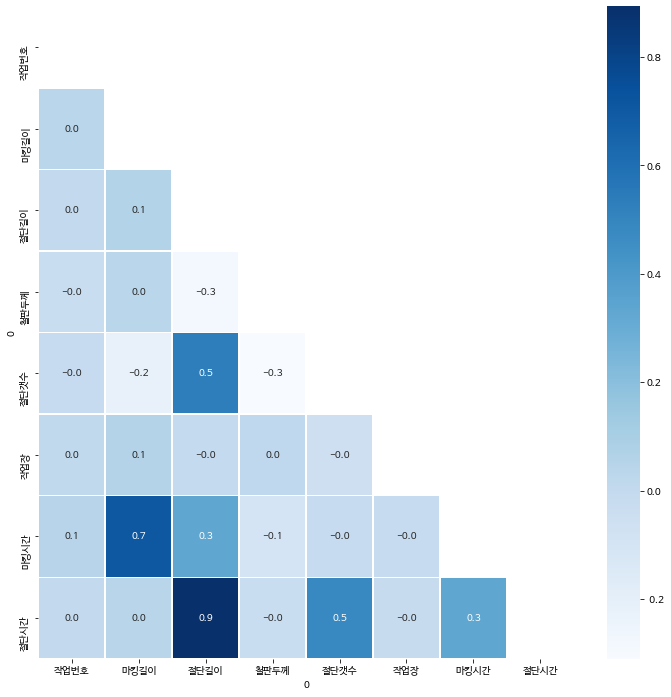

In [15]:
f, ax = plt.subplots(figsize=(12,12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4, linecolor='white', fmt='.1f', ax=ax, cmap='Blues', mask=mask)
plt.show()

## 시각화

### 범주형 피쳐 빈도분석 

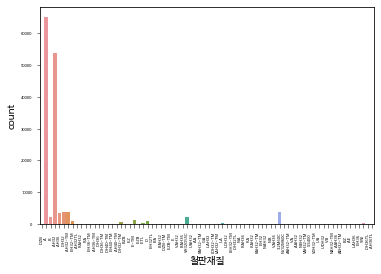

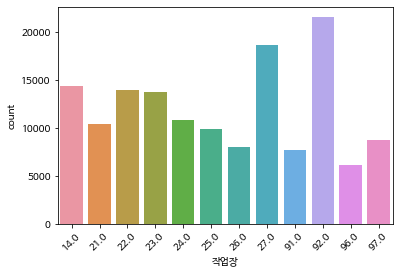

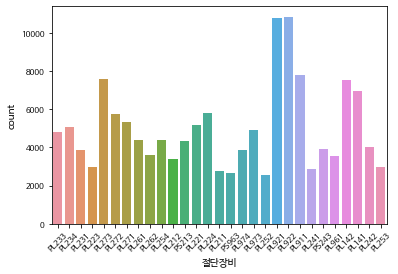

In [81]:
import seaborn as sns

#figure, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(50,10)
plt.xticks(rotation=90)
plt.tick_params(width=0.5,labelsize=4)
sns.countplot(x = "철판재질", data = data )#, ax=ax1)
plt.show()
plt.xticks(rotation=45)
sns.countplot(x = "작업장", data = data)#, ax=ax2)
plt.show()
plt.xticks(rotation=45)
sns.countplot(x = "절단장비", data = data)#, ax=ax3)
plt.tick_params(labelsize=8)
plt.show()


### 타겟값과 어느정도 연관성을 가질까 

#### 범주형 데이터 파악 : barplot 이용 

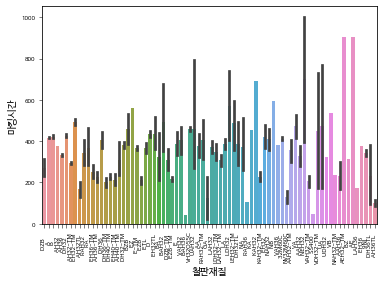

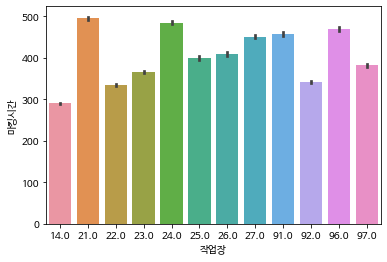

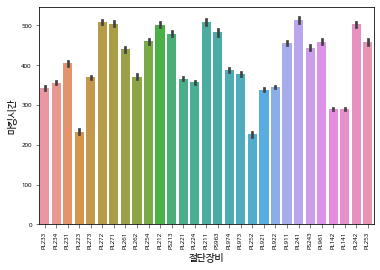

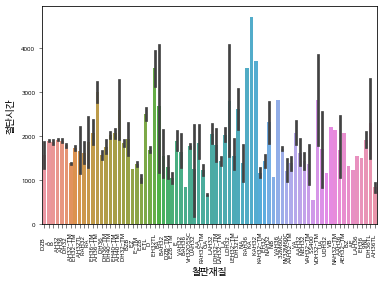

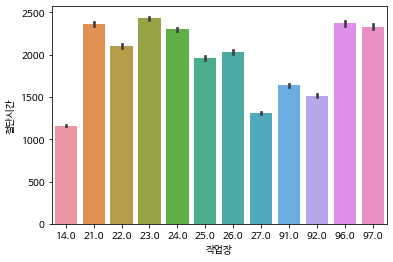

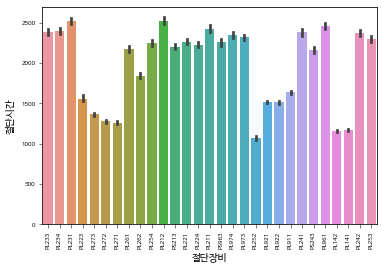

In [87]:
figure.set_size_inches(30,10)

sns.barplot(data=data, x="철판재질", y="마킹시간")
plt.xticks(rotation=90)
plt.tick_params(width=0.5,labelsize=6)
plt.show()

sns.barplot(data=data, x="작업장", y="마킹시간")#, ax=ax2)
plt.show()

sns.barplot(data=data, x="절단장비", y="마킹시간")#", ax=ax3)
plt.xticks(rotation=90)
plt.tick_params(width=0.5,labelsize=6)
plt.show()


sns.barplot(data=data, x="철판재질", y="절단시간")#, ax=ax4)
plt.xticks(rotation=90)
plt.tick_params(width=0.5,labelsize=6)
plt.show()

sns.barplot(data=data, x="작업장", y="절단시간")#, ax=ax5)
plt.show()

sns.barplot(data=data, x="절단장비", y="절단시간")#, ax=ax6)
plt.xticks(rotation=90)
plt.tick_params(width=0.5,labelsize=6)
plt.show()


#### 연속형 데이터 파악 : lineplot 이용 

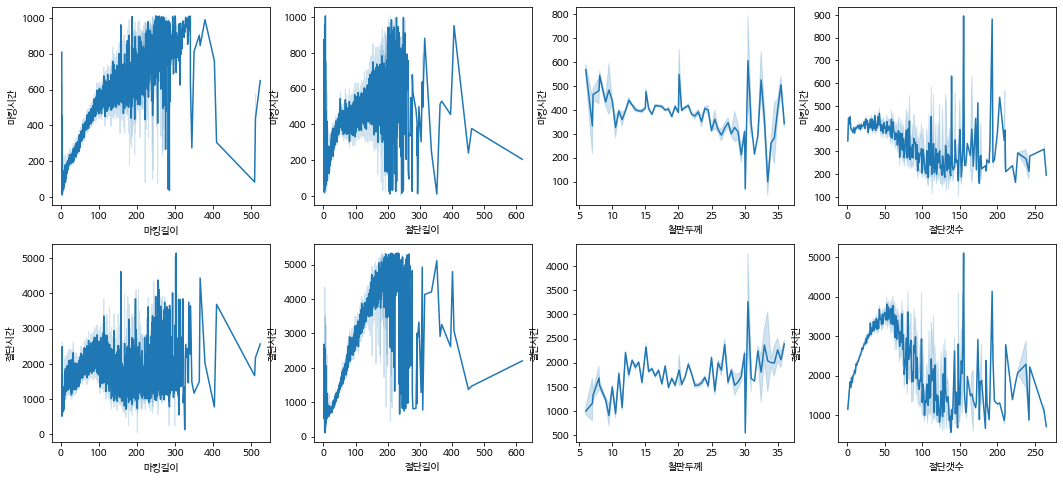

In [18]:
figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(18,8)


sns.lineplot(data=data, x="마킹길이", y="마킹시간", ax=ax1)
sns.lineplot(data=data, x="절단길이", y="마킹시간", ax=ax2)
sns.lineplot(data=data, x="철판두께", y="마킹시간", ax=ax3)
sns.lineplot(data=data, x="절단갯수", y="마킹시간", ax=ax4)

sns.lineplot(data=data, x="마킹길이", y="절단시간", ax=ax5)
sns.lineplot(data=data, x="절단길이", y="절단시간", ax=ax6)
sns.lineplot(data=data, x="철판두께", y="절단시간", ax=ax7)
sns.lineplot(data=data, x="절단갯수", y="절단시간", ax=ax8)


* **마킹시간 관련**
* (하늘색 음영구간은 신뢰구간을 의미합니다)
* 마킹길이와, 절단길이가 짧을수록 마킹 소요시간이 적었음
* 철판두께는 두꺼워질수록 마킹소요시간이 많이 걸린다거나 하지않았음
  * 특정 두께부터 장비,작업장,철판재질등이 바뀐것은 아닐까 예상이 되었음
* **절단시간 관련**
* 절단길이가 300정도에서 어느정도 선대칭적인 양상을 보였음
* 철판두께는 마킹시간에서와 달리 조금이나마 비례적인 양상을 보였음
* 절단갯수의 경우 전체적으로 4차함수의 형태를 보였음 (극점3군데) 


### 작업장 별 절단장비를 파악해보자

#### 특정 철판두께별 작업환경(사용재질, 장비, 작업장)이 달라질까?

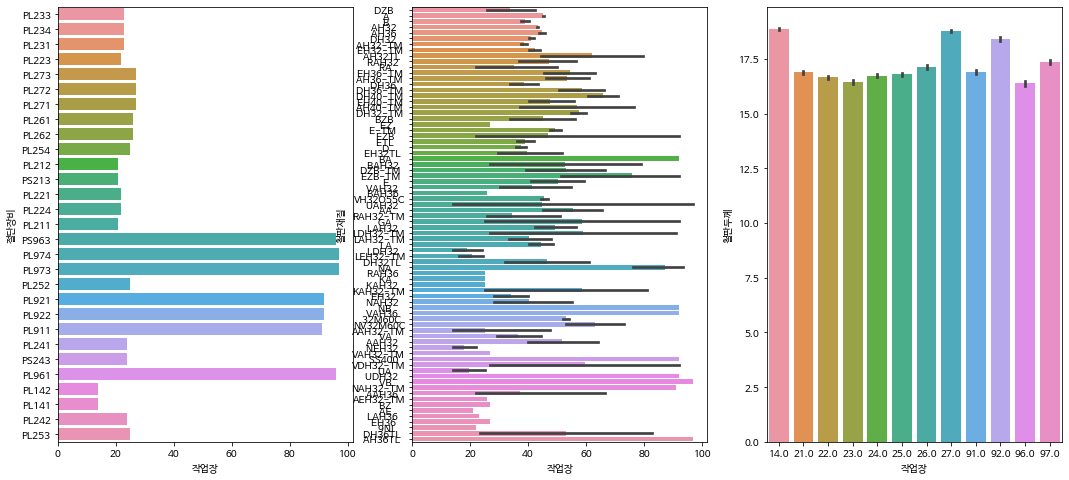

In [19]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=data, x="작업장", y="절단장비", ax=ax1)
sns.barplot(data=data, x="작업장", y="철판재질", ax=ax2)
sns.barplot(data=data, x="작업장", y="철판두께", ax=ax3)

* **검정막대는 신뢰구간을 의미합니다**
* 작업장도 범주형변수라서 첫번째, 두번째 그림같은 표현이 이상적인 표현은 아니지만 시각화를 위해서 float으로 타입변경 후 표현했습니다
* 1번) 963, 974, 973, 921, 922, 911, 961 장비만 90번대 작업장을 이용함을 알게되었습니다
  * 절단장비는 총 29종류이며, 작업장은 12개중 90번대 작업장은 4종류 입니다
* 2번) 마찬가지로 철판재질도 특정 작업장을 사용하는경우가 있음을 알게되었습니다
* 3번) 하지만 작업장별 사용 철판두께를 달리하지는 않는 것 같습니다

* **마킹시간**
* 특정 철판재질, 절단장비 하나에 한해서 마킹시간이 많이소요되는 결과값이 있다
* 작업장은 25번과 26번을 이용할경우 마킹시간이 많이소요 되었다
* **절단시간**
* 25번 26번 작업장이라고 절단시간도 많이 소요되지는 않았다
* 절단장비는 마킹시간에 비해 절단시간에는 튀는 결과가 보이지는 않았다


### 작업장과 절단장비가 어느정도 주어진 건 아닐까?

In [20]:
data.작업장 = data.작업장.astype(float)
print(data['작업장'].unique())

[23. 22. 27. 26. 25. 21. 96. 97. 92. 91. 24. 14.]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 작업장과 절단장비의 빈도분석 

In [21]:
pd.set_option('display.max_rows', 100)

workplace = (data['작업장'] == 14)
data14 = data.loc[workplace, '절단장비']
print(data14)

257       PL142
258       PL141
447       PL141
448       PL141
449       PL142
          ...  
149226    PL142
149227    PL142
149228    PL142
149247    PL142
149248    PL142
Name: 절단장비, Length: 14455, dtype: object


In [22]:
workplace = (data['작업장'] == 21)
data21 = data.loc[workplace, '절단장비']
print(data21)

51        PL212
52        PS213
53        PL212
54        PS213
57        PL212
          ...  
148756    PL211
149108    PS213
149109    PS213
149110    PS213
149249    PS213
Name: 절단장비, Length: 10463, dtype: object


In [23]:
workplace = (data['작업장'] == 96)
data96 = data.loc[workplace, '절단장비']
print(data96)

84        PS963
85        PS963
86        PS963
88        PS963
91        PS963
          ...  
149167    PL961
149169    PL961
149172    PL961
149206    PL961
149208    PL961
Name: 절단장비, Length: 6209, dtype: object


In [24]:
workplace = (data['작업장'] == 97)
data97 = data.loc[workplace, '절단장비']
print(data97)

87        PL974
89        PL973
90        PL973
92        PL973
93        PL973
          ...  
149211    PL973
149251    PL973
149252    PL973
149253    PL974
149254    PL974
Name: 절단장비, Length: 8788, dtype: object


In [25]:


cutter_dict = {'14작업장 :' : '141, 142',
'21작업장 :' : '211, 212, 213(ps)',
'22작업장 :' : '221, 223, 224',
'23작업장 :' : '231, 233, 234',
'24작업장 :' : '241, 242, 243(ps)',
'25작업장 :' : '252, 253, 254',
'26작업장 :' : '261, 262',
'27작업장 :' : '271, 272, 273', 
'91작업장 :' : '911',
'92작업장 :' : '921, 922',
'96작업장 :' : '961, 963(ps)',
'97작업장 :' : '973, 974'}

cutter = pd.Series(cutter_dict)

summary = pd.DataFrame({'사용된 절단장비 종류':cutter})

print(summary)

               사용된 절단장비 종류
14작업장 :           141, 142
21작업장 :  211, 212, 213(ps)
22작업장 :      221, 223, 224
23작업장 :      231, 233, 234
24작업장 :  241, 242, 243(ps)
25작업장 :      252, 253, 254
26작업장 :           261, 262
27작업장 :      271, 272, 273
91작업장 :                911
92작업장 :           921, 922
96작업장 :       961, 963(ps)
97작업장 :           973, 974


> * **절단장비의 앞 두자리가 작업장 명칭에 따라가는 것을** 알수있었습니다.
* 대부분 PL로 시작하는 장비가 사용되었지만, **213번 243번 963번에 한해서는 PS**로 시작되었습니다
* 작업장 별로 사용되는 절단장비의 종류의 수가 일정하진 않았습니다. 

### 왜 특정3가지 장비만 PS로 시작할까?
* 혹시 특정상황에 있어서 PS로 시작하는 장비가 가용되는 것은 아닐까, 하는 의문을 갖고 편상관분석을 진행해보았습니다.

In [26]:
# 전처리를 마친 전체데이터의 상관정도
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
total_data = data.loc[:,col]
total_data.corr(method = 'pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.064779,0.040899,-0.217742,0.708683,0.043909
절단길이,0.064779,1.000000,-0.283597,0.532988,0.336746,0.893000
철판두께,0.040899,-0.283597,1.000000,-0.310356,-0.094868,-0.024261
절단갯수,-0.217742,0.532988,-0.310356,1.000000,-0.006328,0.485044
마킹시간,0.708683,0.336746,-0.094868,-0.006328,1.000000,0.336412
절단시간,0.043909,0.893000,-0.024261,0.485044,0.336412,1.000000


#### 213번 절단장비를 사용한경우 

In [27]:
row = (data['절단장비'] == 'PS213')
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data213 = data.loc[row, col]
data213.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.085731,0.010294,-0.222086,0.719900,0.044915
절단길이,0.085731,1.000000,-0.272553,0.729387,0.418885,0.898019
철판두께,0.010294,-0.272553,1.000000,-0.269775,-0.074716,0.045453
절단갯수,-0.222086,0.729387,-0.269775,1.000000,0.042351,0.688249
마킹시간,0.719900,0.418885,-0.074716,0.042351,1.000000,0.376473
절단시간,0.044915,0.898019,0.045453,0.688249,0.376473,1.000000


#### 243번 절단장비를 사용한경우

In [28]:
row = (data['절단장비'] == 'PS243')
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data243 = data.loc[row, col]
data243.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.129418,-0.139928,-0.177434,0.738222,0.052811
절단길이,0.129418,1.000000,-0.258426,0.747460,0.409152,0.872780
철판두께,-0.139928,-0.258426,1.000000,-0.183053,-0.201323,0.119685
절단갯수,-0.177434,0.747460,-0.183053,1.000000,0.062040,0.694828
마킹시간,0.738222,0.409152,-0.201323,0.062040,1.000000,0.342385
절단시간,0.052811,0.872780,0.119685,0.694828,0.342385,1.000000


#### 963번 절단장비를 사용한경우 

In [29]:
row = (data['절단장비'] == 'PS963')
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data963 = data.loc[row, col]
data963.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.348947,-0.302317,-0.036564,0.753309,0.223474
절단길이,0.348947,1.000000,-0.352125,0.720531,0.544728,0.857203
철판두께,-0.302317,-0.352125,1.000000,-0.291949,-0.268675,0.041906
절단갯수,-0.036564,0.720531,-0.291949,1.000000,0.190534,0.615299
마킹시간,0.753309,0.544728,-0.268675,0.190534,1.000000,0.476800
절단시간,0.223474,0.857203,0.041906,0.615299,0.476800,1.000000


#### PS장비를 사용한경우 상관분석 시각화 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '\nPS963 절단장비를 이용한경우')

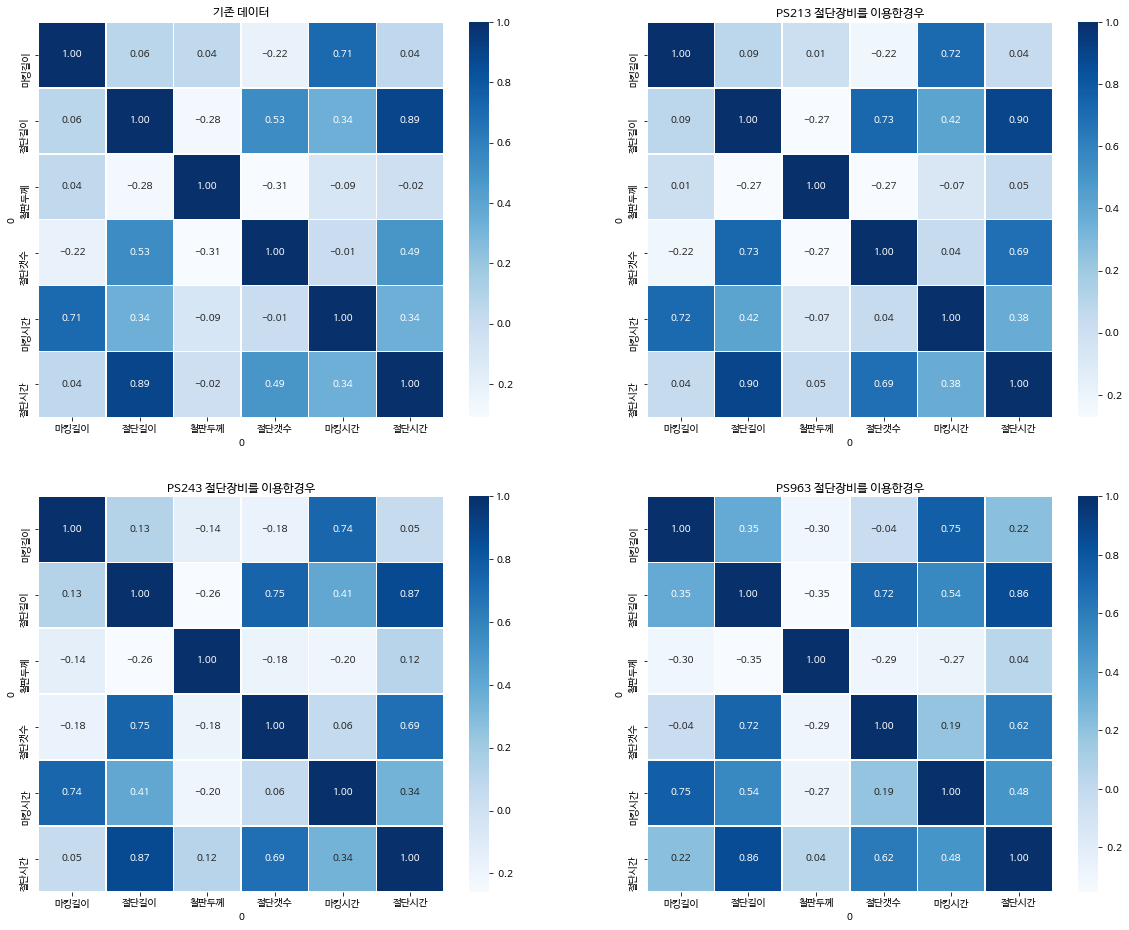

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns    
#plt.figure(figsize=(10,10))
'''sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)'''


figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,16)


sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)
ax1.set_title('기존 데이터')

sns.heatmap(data = data213.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax2)
ax2.set_title('PS213 절단장비를 이용한경우')

sns.heatmap(data = data243.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax3)
ax3.set_title('\nPS243 절단장비를 이용한경우')

sns.heatmap(data = data963.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax4)
ax4.set_title('\nPS963 절단장비를 이용한경우')

> * 타겟값 관련해서 거의 모든 지표에서 상관계수가 증가하였다.

### 사용상황을 추측해보자 

In [31]:
print("원래 데이터\n",total_data.mean())
print("\nps213장비\n",data213.mean())
print("\nps243장비\n",data243.mean())
print("\nps963장비\n",data963.mean())

원래 데이터
 0
마킹길이      75.087858
절단길이      66.030539
철판두께      17.500191
절단갯수      11.297112
마킹시간     395.842861
절단시간    1869.139100
dtype: float64

ps213장비
 0
마킹길이      57.819432
절단길이      76.360143
철판두께      16.465520
절단갯수      15.228941
마킹시간     479.459497
절단시간    2205.117701
dtype: float64

ps243장비
 0
마킹길이      57.738305
절단길이      74.066226
철판두께      16.748435
절단갯수      14.437007
마킹시간     444.572919
절단시간    2163.403156
dtype: float64

ps963장비
 0
마킹길이      60.931099
절단길이      78.399360
철판두께      17.373193
절단갯수      14.606175
마킹시간     482.657380
절단시간    2256.432229
dtype: float64


> * ps장비를 쓰는경우는 (평균값만 보면) 마킹길이가 짧고, 절단길이가 긴경우에 한해서 쓰지 않을까 하고 추측이 되었다.

#### 특정값의 특정수치 초과하는 경우에 ps장비를 쓰지않을까 하는 생각으로 추측해보고자, 각 경우의 최소와 최대경우를 확인해보았다. 

In [32]:
print(total_data.min())
print(data213.min())
print(data243.min())
print(data963.min())

0
마킹길이    3.2
절단길이    1.1
철판두께    6.0
절단갯수    1.0
마킹시간    1.0
절단시간    2.0
dtype: float64
0
마킹길이     5.0
절단길이     5.0
철판두께     6.0
절단갯수     1.0
마킹시간     3.0
절단시간    24.0
dtype: float64
0
마킹길이      5.0
절단길이      4.6
철판두께      6.0
절단갯수      1.0
마킹시간      6.0
절단시간    320.0
dtype: float64
0
마킹길이     4.2
절단길이     8.8
철판두께     6.0
절단갯수     1.0
마킹시간     4.0
절단시간    16.0
dtype: float64


In [33]:
print(total_data.max())
print(data213.max())
print(data243.max())
print(data963.max())

0
마킹길이     524.4
절단길이     619.7
철판두께      36.0
절단갯수     265.0
마킹시간    1011.0
절단시간    5335.0
dtype: float64
0
마킹길이     256.2
절단길이     233.0
철판두께      35.5
절단갯수     113.0
마킹시간    1011.0
절단시간    5331.0
dtype: float64
0
마킹길이     315.5
절단길이     270.0
철판두께      36.0
절단갯수     124.0
마킹시간    1010.0
절단시간    5332.0
dtype: float64
0
마킹길이     177.9
절단길이     268.6
철판두께      35.0
절단갯수      92.0
마킹시간    1010.0
절단시간    5332.0
dtype: float64


> * 이렇다 할 결과를 얻지 못하였다

#### "마킹길이가 짧고 절단길이가 길다"
* 위의 특징을 작업장으로 연결지어서 생각해보았다
* 혹시나 작업장의 특징으로 연결이 된다면 작업장 배열을 임의적으로 하는것이 아니라, 투입되는 재료에 따라 물리적 배치를 상이하게 하여 배치하는 방법을 제안할 수 있을 것 같았다. 

> ps를 쓰는 작업장은 정해져있으니까 이를 통해 편상관분석을 절단장비가 아닌 작업장 기준으로 다시 해보았습니다. 

In [34]:
row = (data['작업장'] == 21) # 총 12,881건 
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data21 = data.loc[row, col]
data21.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.006333,0.057575,-0.249673,0.677431,0.041906
절단길이,0.006333,1.000000,-0.313984,0.725582,0.354193,0.871791
철판두께,0.057575,-0.313984,1.000000,-0.297450,-0.086665,0.051652
절단갯수,-0.249673,0.725582,-0.297450,1.000000,0.030902,0.614196
마킹시간,0.677431,0.354193,-0.086665,0.030902,1.000000,0.339375
절단시간,0.041906,0.871791,0.051652,0.614196,0.339375,1.000000


In [35]:
row = (data['작업장'] == 24) # 13,361건
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data24 = data.loc[row, col]
data24.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.050381,0.029888,-0.198910,0.677185,0.079046
절단길이,0.050381,1.000000,-0.266871,0.739977,0.355549,0.855034
철판두께,0.029888,-0.266871,1.000000,-0.238051,-0.108620,0.114051
절단갯수,-0.198910,0.739977,-0.238051,1.000000,0.061135,0.606541
마킹시간,0.677185,0.355549,-0.108620,0.061135,1.000000,0.353615
절단시간,0.079046,0.855034,0.114051,0.606541,0.353615,1.000000


In [36]:
row = (data['작업장'] == 96) # 7,467건
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data96 = data.loc[row, col]
data96.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.289647,-0.192592,-0.073122,0.744935,0.218768
절단길이,0.289647,1.000000,-0.276336,0.711836,0.455990,0.853229
철판두께,-0.192592,-0.276336,1.000000,-0.279463,-0.169280,0.095580
절단갯수,-0.073122,0.711836,-0.279463,1.000000,0.122325,0.563801
마킹시간,0.744935,0.455990,-0.169280,0.122325,1.000000,0.423368
절단시간,0.218768,0.853229,0.095580,0.563801,0.423368,1.000000


#### 작업장 편상관분석 시각화

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '\n96번 작업장에서 작업한경우')

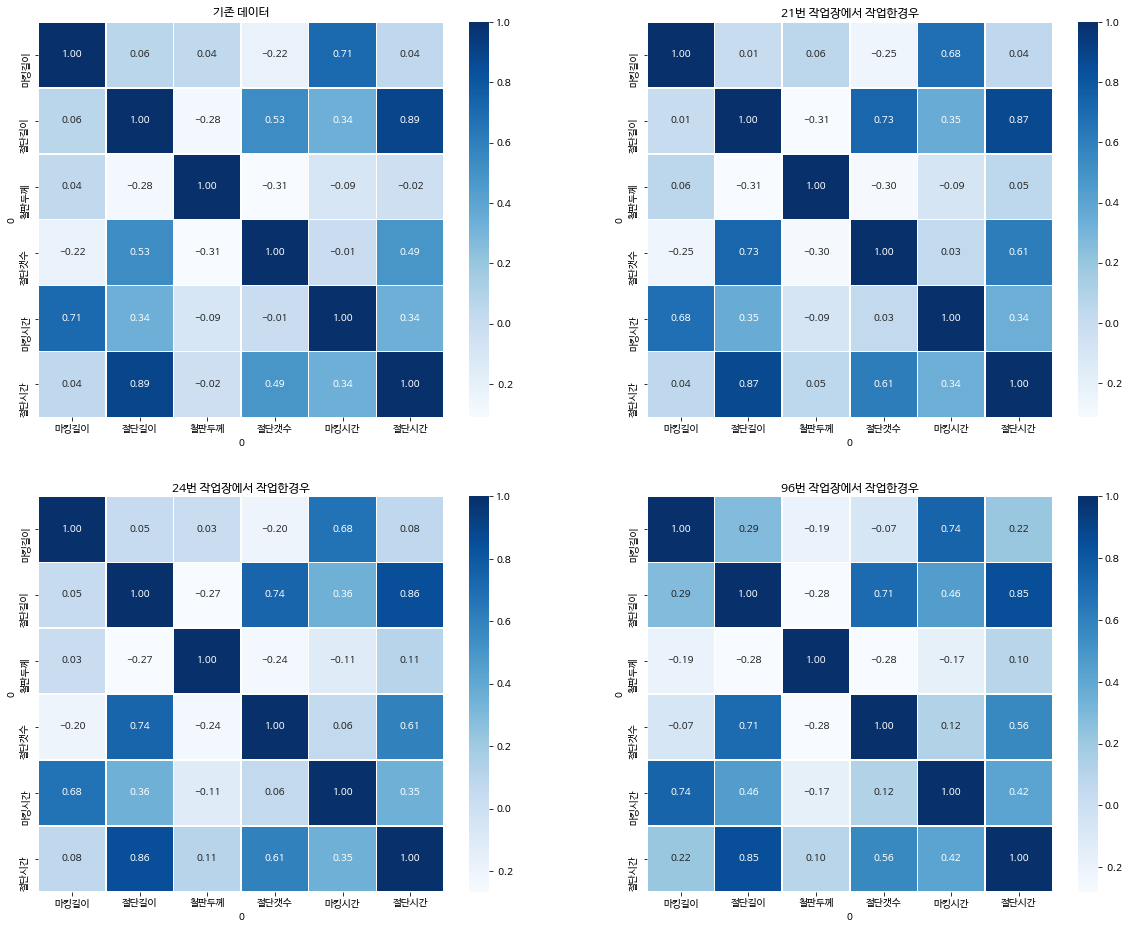

In [85]:
import matplotlib.pyplot as plt 
import seaborn as sns    
#plt.figure(figsize=(10,10))
'''sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)'''


figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,16)


sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)
ax1.set_title('기존 데이터')

sns.heatmap(data = data21.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax2)
ax2.set_title('21번 작업장에서 작업한경우')

sns.heatmap(data = data24.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax3)
ax3.set_title('\n24번 작업장에서 작업한경우')

sns.heatmap(data = data96.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax4)
ax4.set_title('\n96번 작업장에서 작업한경우')

> * 공통적으로 찾을 수 있는 점은, [절단길이-절단갯수], [절단시간-절단갯수]의 상관성이 증가했다는 점이 였다. 